# Завдання №3 РСА

In [21]:
import numpy as np
from time import process_time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt


*Завдання 1: Розбийте MNIST на тренувальну та навчальну вибірки (60k + 10k). Натренуйте Random Forest classifier ти виміряйте час тренування. Обчисліть точність на тестовій вибірці.*

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)

In [6]:
start = process_time()

In [7]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end = process_time()

In [8]:
print(f"Training took us {((end-start)/60):.1f} minutes.")

Training took us 0.9 minutes.


In [9]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 0.9668


*Завдання 2: Застосуйте PCA з поясненою дисперсією 95%. Повторіть тренування. Порівняйте час тренування та точніть з попередньою вправою.*

# PCA via Scikit-learn tools

In [76]:
pca_full = PCA().fit(X_train)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # min amount of components with this disperse
print(f"For 95% disp optimal amount of components will be {optimal_components} components.")

For 95% disp optimal amount of components will be 154 components.


In [12]:
# we choose high explained variance as it usually indicates that the model fits the data well
pca = PCA(n_components=0.95, random_state=42)

In [13]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [77]:
print(f"PCA model chose {pca.n_components_} components to retain 95% of the variance.")

The PCA model chose 154 components to retain 95% of the variance.


Let's have a look at it

In [23]:
pd.DataFrame(X_train_pca).head(1)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,859.876066,-21.019837,-817.592287,-101.271182,287.550924,303.068107,16.415654,-101.266964,-147.733711,635.527224,...,19.6839,-48.132034,110.079557,63.553056,2.765782,-59.604145,-41.331439,-27.136054,25.923343,-76.307887


In [24]:
pd.DataFrame(X_test_pca).head(1)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,721.748553,399.009737,324.848869,457.257985,868.837513,623.158763,-328.283471,-98.042645,-162.591941,124.147185,...,-24.475335,-71.593369,-7.737512,15.335717,-31.638253,3.439306,8.28619,-2.35117,34.97652,-73.048506


Here we're insersing original dataset using pca-dataset

In [25]:
X_train_pca_inversed = pca.inverse_transform(X_train_pca)

In [26]:
X_test_pca_inversed = pca.inverse_transform(X_test_pca)

Obviously we've lost part information after PCA

In [27]:
np.allclose(X_train_pca_inversed, X_train)

False

In [28]:
np.allclose(X_test_pca_inversed, X_test)

False

let's calculate the recovery error

In [29]:
np.mean(np.sum(np.square(X_train_pca_inversed - X_train), axis=1))

170321.710633931

In [30]:
np.mean(np.sum(np.square(X_test_pca_inversed - X_test), axis=1))

170894.74138025937

In [32]:
pca.explained_variance_ratio_

array([0.09736019, 0.07162769, 0.06157279, 0.05407583, 0.04894241,
       0.04314663, 0.0326955 , 0.02886339, 0.02755206, 0.02336354,
       0.02114186, 0.02036159, 0.01710273, 0.01697588, 0.01579852,
       0.01483028, 0.01315072, 0.01277798, 0.01188548, 0.01154643,
       0.01069553, 0.01010967, 0.00954102, 0.00907833, 0.00882614,
       0.00838996, 0.00809334, 0.00785285, 0.00740609, 0.00689452,
       0.00657504, 0.00644894, 0.00601529, 0.00586087, 0.00568734,
       0.00542785, 0.00505607, 0.00487531, 0.00479006, 0.00466511,
       0.00454422, 0.00445376, 0.00419137, 0.00396211, 0.00384115,
       0.00375532, 0.00361444, 0.00350354, 0.00338201, 0.00319514,
       0.00316586, 0.00309288, 0.00295258, 0.00287322, 0.00282207,
       0.00269456, 0.00267291, 0.00256465, 0.00253613, 0.00243878,
       0.00239702, 0.00238198, 0.00229797, 0.00221263, 0.00212635,
       0.00205955, 0.00202272, 0.00194566, 0.00191948, 0.00188817,
       0.00187128, 0.00180041, 0.00176297, 0.00172727, 0.00164

variance loss

In [33]:
1 - pca.explained_variance_ratio_.sum()

0.049631788853028436

# Explained Variance Plot

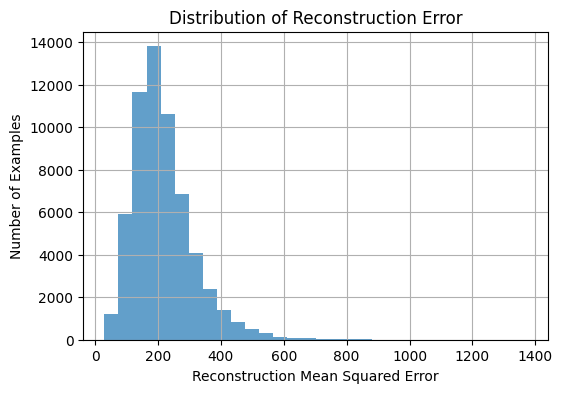

In [46]:
# reconstruction error distribution
X_train_reconstructed = pca.inverse_transform(X_train_pca)
mse = np.mean((X_train - X_train_reconstructed) ** 2, axis=1)

plt.figure(figsize=(6, 4))
plt.hist(mse, bins=30, alpha=0.7)
plt.xlabel("Reconstruction Mean Squared Error")
plt.ylabel("Number of Examples")
plt.title("Distribution of Reconstruction Error")
plt.grid(True)
plt.show()

From this graph we can tell that the majority of examples have relatively low RE. PCA effectively captures most of the important information from the original data, meaning that reduced data retains most of the original variance.

In [34]:
# retrain our model on DS with pca
start = process_time()
rfc_pca = RandomForestClassifier(random_state=42)
rfc_pca.fit(X_train_pca, y_train)
end = process_time()

In [35]:
print(f"Training time of Random Forest after PCA: {((end - start) / 60):.1f} minutes.")

Training time of Random Forest after PCA: 2.7 minutes.


In [37]:
y_pred_pca = rfc_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy for RF after PCA: {accuracy_pca:.4f}")

Accuracy for RF after PCA: 0.9487


*Завдання 3: Повторіть ці ж кроки з логістичною регресією. Зробіть висновки.*

In [38]:
start = process_time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
end = process_time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(f"Training took us {((end - start) / 60):.1f} minutes.")

Training took us 1.0 minutes.


In [40]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 0.9189


# Let's retrain Logistic Regression model on dataset with PCA as well

In [47]:
start = process_time()
log_reg_pca = LogisticRegression(random_state=42)
log_reg_pca.fit(X_train_pca, y_train)
end = process_time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print(f"Training time of Logistic Regression after PCA: {((end - start) / 60):.1f} minutes.")

Training time of Logistic Regression after PCA: 0.2 minutes.


In [51]:
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy for Logistic Regression  after PCA: {accuracy_pca:.4f}")

Accuracy for Logistic Regression  after PCA: 0.9141


PCA resulted in a minor reduction in accuracy from 96.82% to 94.84% for RF and from 91.8 to 91.4 for LR. This trade-off is acceptable when optimizing for computational efficiency, as the loss in accuracy is not substantial. It was interesting to notice how training time for Random Forest grown from 0.5 minute to 2 minutes but the performance got worse.

Applying PCA with 95% explained variance is useful when model training time and computational resources are constrained, but it doesn't guarantee that the training and testing performance will get better eventually. A slight decrease of accuracy score is acceptable, as a descriptive component gets weaker.